In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Read data

In [3]:
df1 = pd.read_csv('./data/LoanStats_securev1_2017Q1.csv', skiprows=[0])
df2 = pd.read_csv('./data/LoanStats_securev1_2017Q2.csv', skiprows=[0])
df3 = pd.read_csv('./data/LoanStats_securev1_2017Q3.csv', skiprows=[0])
df4 = pd.read_csv('./data/LoanStats3c_securev1_2014.csv', skiprows=[0])
df5 = pd.read_csv('./data/LoanStats3d_securev1_2015.csv', skiprows=[0])

### Check if all the datasets have same column

In [4]:
columns = np.dstack((list(df1.columns), list(df2.columns), list(df3.columns), list(df4.columns), list(df5.columns))) 

In [5]:
coldf = pd.DataFrame(columns[0])

In [6]:
coldf

,0,1,2,3,4
0,id,id,id,id,id
1,member_id,member_id,member_id,member_id,member_id
2,loan_amnt,loan_amnt,loan_amnt,loan_amnt,loan_amnt
3,funded_amnt,funded_amnt,funded_amnt,funded_amnt,funded_amnt
4,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv
5,term,term,term,term,term
6,int_rate,int_rate,int_rate,int_rate,int_rate
7,installment,installment,installment,installment,installment
8,grade,grade,grade,grade,grade
9,sub_grade,sub_grade,sub_grade,sub_grade,sub_grade


In [7]:
df = pd.concat([df1, df2, df3, df4, df5])

### Get familiar with data

In [8]:
df.shape

(981665, 151)

In [9]:
print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [62]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,31.07,0.0,May-1996,725.0,729.0,0.0,NaN,NaN,18.0,0.0,69578.0,63.2%,31.0,w,11438.26,11438.26,3912.17,3912.17,2561.74,1350.43,0.0,0.0,0.0,Dec-2017,492.13,Jan-2018,Dec-2017,714.0,710.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,202617.0,0.0,3.0,0.0,1.0,22.0,34430.0,57.0,0.0,2.0,13686.0,61.0,110037.0,0.0,9.0,0.0,3.0,11257.0,29762.0,63.4,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,NaN,13.0,NaN,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,067xx,CT,6.06,0.0,Jan-2004,765.0,769.0,4.0,NaN,NaN,11.0,0.0,8678.0,18.8%,16.0,f,4190.59,4190.59,1586.64,1586.64,809.41,777.23,0.0,0.0,0.0,Dec-2017,200.10,Jan-2018,Dec-2017,779.0,775.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,44754.0,1.0,3.0,2.0,4.0,7.0,35832.0,68.0,2.0,2.0,8659.0,27.0,46200.0,2.0,0.0,6.0,6.0,4069.0,37522.0,18.8,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,100763.0,447

In [63]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,float64,111
1,object,40


### Select data with loan_status either Fully Paid or Charged Off 

In [10]:
df.loan_status.value_counts()

Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: loan_status, dtype: int64

In [11]:
df = df.loc[(df['loan_status'].isin(['Fully Paid', 'Charged Off']))]

In [12]:
df.shape

(457728, 151)

### Feature selections and clean

### Find the missing columns and their types

In [17]:
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [18]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
1,tot_hi_cred_lim,0,float64
2,tot_cur_bal,0,float64
3,tot_coll_amt,0,float64
4,acc_now_delinq,0,float64
5,total_bal_ex_mort,0,float64
6,total_bc_limit,0,float64
7,total_il_high_credit_limit,0,float64
9,policy_code,0,float64
10,collections_12_mths_ex_med,0,float64
11,last_fico_range_low,0,float64


#### 1. Remove rows associated with 10 missing value features:

In [13]:
missing_df = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()

In [14]:
miss_10 = list(missing_df[missing_df.missing_value <= 11]['index'])

In [15]:
null_data = df[df[miss_10].isnull().any(axis=1)]

In [16]:
null_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
165239,15530299,NaN,23900.0,23900.0,23900.0,36 months,15.61%,835.66,C,C5,Drafter,1 year,RENT,60000.0,Verified,May-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,770xx,TX,0.00,0.0,Sep-2004,700.0,704.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,11.0,w,0.0,0.0,27006.320000,27006.32,23900.00,3106.32,0.0,0.00,0.0000,Apr-2015,18649.72,NaN,Apr-2015,734.0,730.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,115.0,104.0,30.0,30.0,0.0,NaN,NaN,12.0,NaN,0.0,0.0,0.0,0.0,3.0,5.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
173720,14650261,NaN,7000.0,7000.0,7000.0,36 months,19.47%,258.26,D,D5,Asst Pastor,10+ years,MORTGAGE,50000.0,Verified,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,857xx,AZ,0.00,0.0,Jul-1999,675.0,679.0,0.0,32.0,NaN,1.0,0.0,0.0,NaN,18.0,f,0.0,0.0,7744.372268,7744.37,7000.00,744.37,0.0,0.00,0.0000,Nov-2014,6194.81,NaN,Sep-2017,729.0,725.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,165.0,177.0,54.0,54.0,6.0,177.0,46.0,9.0,46.0,0.0,0.0,0.0,1.0,5.0,5.0,1.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,87.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [157]:
print(null_data.index)
miss_10_row_index = list(null_data.index)

Int64Index([ 81812,  96779,  96780, 105451, 105452, 122701, 122702, 235629,
            235630,  85927, 421095, 421096],
           dtype='int64')


In [159]:
miss_10_row_index.remove(81812)

In [160]:
miss_10_row_index

[96779,
 96780,
 105451,
 105452,
 122701,
 122702,
 235629,
 235630,
 85927,
 421095,
 421096]

In [161]:
df = df[~df.index.isin(miss_10_row_index)]

#### 2. Chek columns have more than 400000 missing values

In [20]:
miss_4000 = list(missing_df[missing_df.missing_value >= 400000]['index'])

In [23]:
print(len(miss_4000))

53


In [25]:
print(sorted(miss_4000))

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'se

In [26]:
df.drop(miss_4000, axis = 1, inplace = True)

#### 3. Remove constant features

In [27]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [28]:
const_features = find_constant_features(df)

In [29]:
const_features

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']

In [34]:
df.hardship_flag.value_counts()

N    457728
Name: hardship_flag, dtype: int64

In [35]:
df.drop(const_features, axis = 1, inplace = True)

#### 2. Remove Duplicate rows

In [36]:
df.shape

(457728, 93)

In [37]:
df.drop_duplicates(inplace= True)

In [38]:
df.shape

(457728, 93)

#### 3. Remove duplicate columns

In [39]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [40]:
duplicate_cols = duplicate_columns(df)

In [41]:
duplicate_cols

['loan_amnt']

#### 4. Remove/process features manually

In [54]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

### 0-10 features

In [42]:
df.iloc[0:5, 0: 10]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
16,104190249,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector
38,104190255,35000.0,35000.0,35000.0,60 months,25.49%,1037.38,E,E4,Human Resource Specialist LER
40,104170260,17000.0,17000.0,17000.0,36 months,7.49%,528.73,A,A4,Air Traffic Controller
51,104046830,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,General manager
56,104220223,5000.0,5000.0,5000.0,36 months,14.99%,173.31,C,C4,Lead Supervisor


In [43]:
len(df.loan_amnt.value_counts())

1415

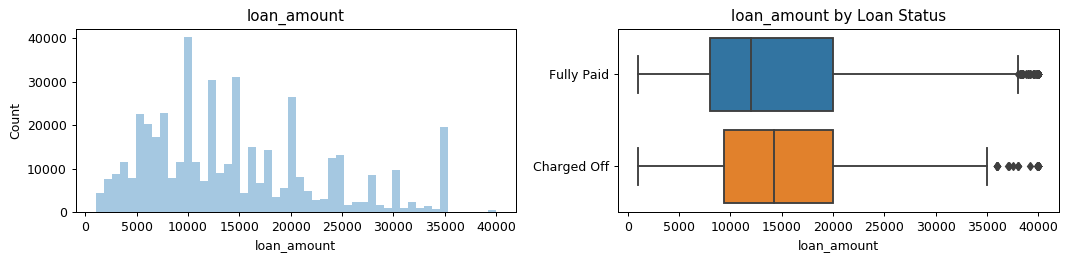

In [56]:
plot_var('loan_amnt', 'loan_amount', True)

It looks like all loans are not unique. Certain amount appear several times. It may be the reason, company has some range or certain amount to lend

##### Term feature

In [44]:
df.term = df.term.str.replace('months', '').astype(np.int)

In [45]:
df.term.value_counts()

36    341042
60    116686
Name: term, dtype: int64

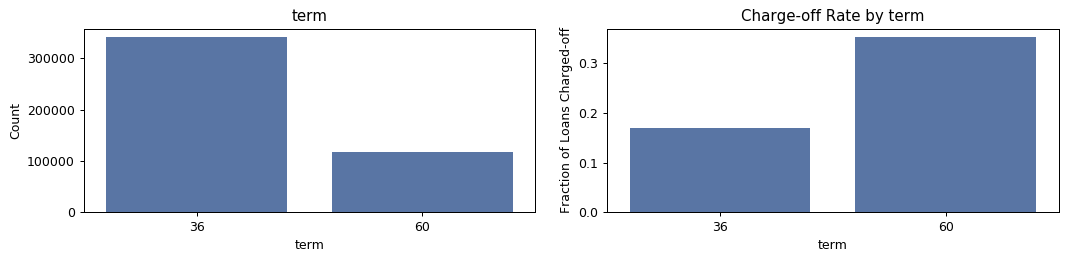

In [57]:
plot_var('term', 'term', False)

##### interest rate

In [46]:
df.int_rate = df.int_rate.str.replace('%', '').astype(np.float32)

In [47]:
len(df.int_rate.value_counts())

200

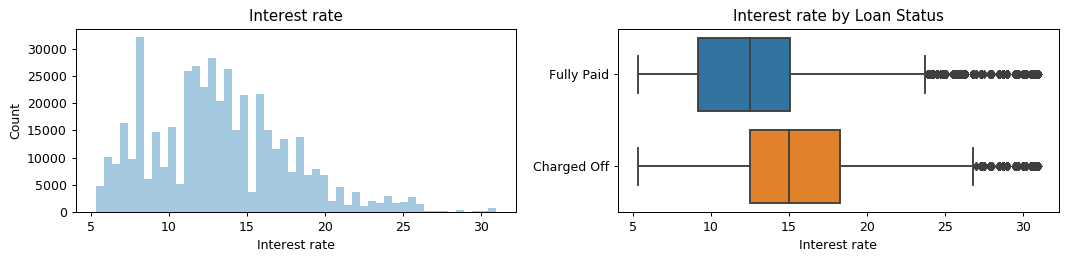

In [58]:
plot_var('int_rate', 'Interest rate', True)

It looks like interest rates are for those who could not pay their debt.

##### grade and subgrade

In [50]:
df.grade.value_counts()

C    129972
B    123078
A     75560
D     74329
E     38835
F     12509
G      3445
Name: grade, dtype: int64

In [51]:
df.sub_grade.value_counts()

C1    27783
C2    27383
B5    26522
C3    26375
B4    26218
C4    25615
B3    25569
B2    22889
C5    22816
A5    22738
B1    21880
D1    19249
A4    17546
D2    16052
D3    14561
D4    13405
A3    11973
A2    11711
A1    11592
D5    11062
E1    10364
E2     9177
E3     7538
E4     6260
E5     5496
F1     3990
F2     2804
F3     2449
F4     1883
F5     1383
G1     1121
G2      864
G3      603
G4      461
G5      396
Name: sub_grade, dtype: int64

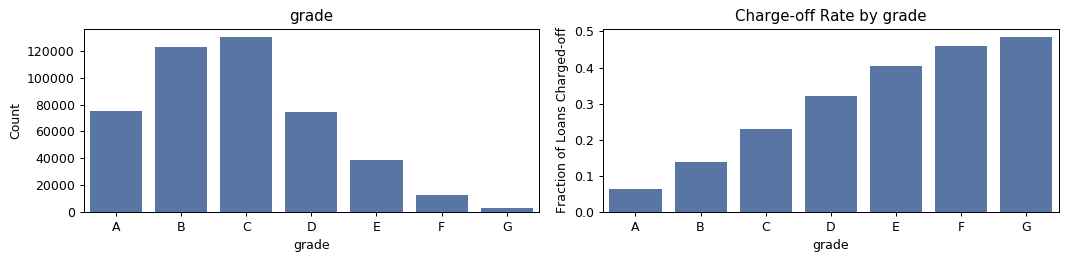

In [61]:
plot_var('grade', 'grade', False)

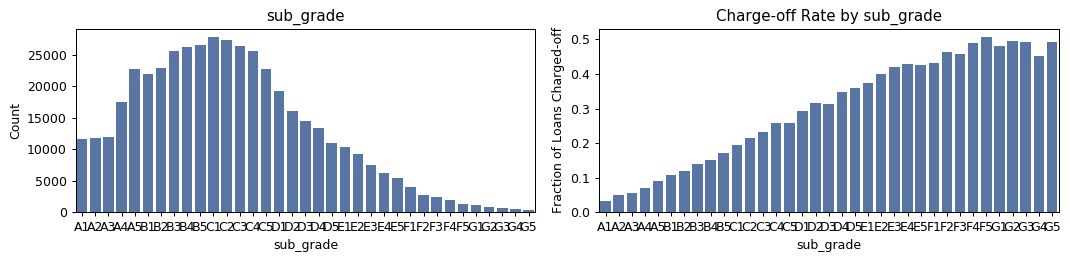

In [62]:
plot_var('sub_grade', 'sub_grade', False)

It seems that grade and sub grade have same shape and relation with loan status. IN this case I would keep sub_grade, because it carries more information than the grade.

In [64]:
df.drop('grade', axis = 1, inplace = True)

##### emp_title

In [65]:
len(df.emp_title.value_counts())

128310

It looks like emp_title has lots of unique value, which may not be strongly associated with predicted loan amount

In [66]:
df.drop('emp_title', axis = 1, inplace= True)

In [67]:
df.drop('id', axis = 1, inplace= True)

#### 11-20 features

In [68]:
df.iloc[0:5, 11: 20]

,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs
16,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,Other,467xx,IN,18.90,0.0
38,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,224xx,VA,14.04,0.0
40,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,840xx,UT,8.41,0.0
51,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,087xx,NJ,13.31,2.0
56,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,945xx,CA,22.50,0.0


#### issue_d

In [181]:
df.issue_d.value_counts()

Oct-2015    48624
Jul-2015    45960
Dec-2015    44343
Aug-2017    43573
Sep-2017    39713
Jul-2017    39410
Oct-2014    38783
Jun-2017    38087
May-2017    37681
Nov-2015    37530
Mar-2017    37181
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Jan-2017    31834
Apr-2017    29680
Jul-2014    29303
Sep-2015    28641
Jun-2015    28485
Feb-2017    27763
Mar-2015    25400
Nov-2014    25054
Feb-2015    23770
May-2014    19099
Apr-2014    19071
Aug-2014    18810
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Sep-2014    10606
Dec-2014    10307
Name: issue_d, dtype: int64

In [69]:
df.issue_d = pd.Series(df.issue_d).str.replace(r'-\d+', '')

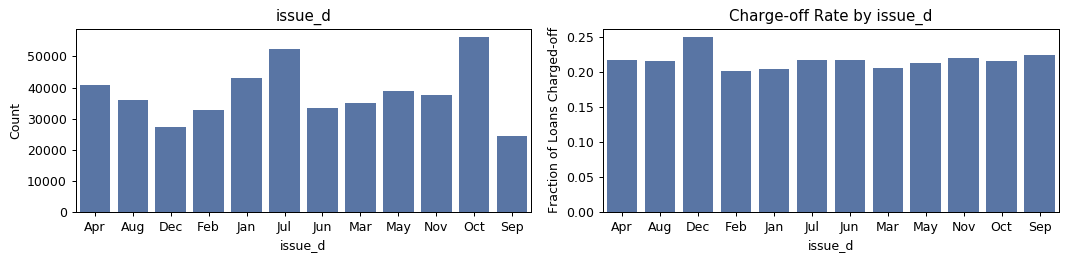

In [70]:
plot_var('issue_d', 'issue_d', False)

In [71]:
df.issue_d = df.issue_d.astype("category", categories=np.unique(df.issue_d)).cat.codes

In [72]:
df.issue_d.value_counts()

10    56130
5     52330
4     43126
0     40668
8     38741
9     37726
1     36135
7     34993
6     33360
3     32650
2     27389
11    24480
Name: issue_d, dtype: int64

#### loan status

In [73]:
df.loan_status.value_counts()

Fully Paid     358629
Charged Off     99099
Name: loan_status, dtype: int64

#### url

In [74]:
df.drop('url', axis = 1, inplace = True)

#### purpose

In [75]:
df.purpose.value_counts()

debt_consolidation    276597
credit_card           102367
home_improvement       27628
other                  22100
major_purchase          8256
medical                 4786
small_business          4206
car                     3963
moving                  2954
vacation                2755
house                   1836
renewable_energy         268
wedding                   11
educational                1
Name: purpose, dtype: int64

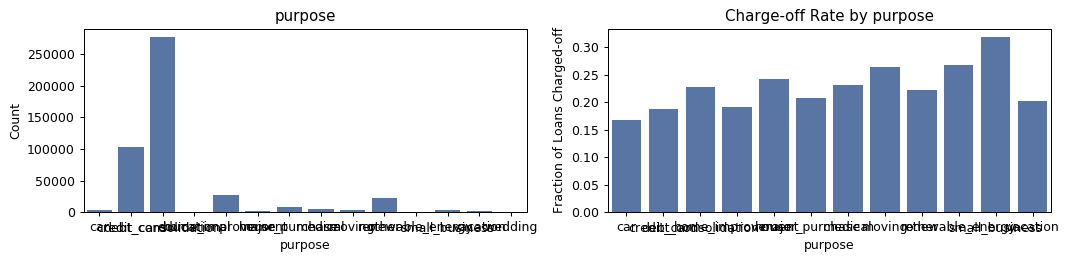

In [76]:
plot_var('purpose', 'purpose', False)

#### title

In [77]:
len(df.title.value_counts())

1935

In [78]:
df.drop('title', axis = 1, inplace = True)

#### zip_code

In [79]:
len(df.zip_code.value_counts())

910

In [80]:
df.drop('zip_code', axis = 1, inplace = True)

### 21 - 30 features

In [81]:
df.iloc[0:5, 21: 30]

,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt
16,NaN,96.0,18.0,1.0,5658.0,14.9%,33.0,w,3765.098751
38,30.0,NaN,17.0,0.0,35694.0,74.8%,31.0,w,36875.078917
40,72.0,89.0,9.0,1.0,15406.0,31.6%,34.0,w,17282.802792
51,8.0,NaN,13.0,0.0,7936.0,31.9%,30.0,w,10365.368358
56,27.0,NaN,6.0,0.0,10276.0,90.1%,18.0,f,5168.906377


In [210]:
df.revol_util = df.revol_util.str.replace('%', '').astype(np.float32)

In [212]:
#df.total_acc.value_counts()

### 31 - 40 features

In [213]:
df.iloc[0:5, 31: 40]

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
0,11438.26,11438.26,3912.17,3912.17,2561.74,1350.43,0.0,0.0,0.0
1,4190.59,4190.59,1586.64,1586.64,809.41,777.23,0.0,0.0,0.0
2,3708.50,3708.50,1205.78,1205.78,891.50,314.28,0.0,0.0,0.0
3,12604.51,12604.51,2585.32,2585.32,1395.49,1189.83,0.0,0.0,0.0
4,11869.91,11869.91,3604.97,3604.97,3130.09,474.88,0.0,0.0,0.0


### 41 - 50 features

In [214]:
df.iloc[0:5, 41: 50]

,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,492.13,Jan-2018,Dec-2017,714.0,710.0,0.0,1.0,Individual,0.0
1,200.10,Jan-2018,Dec-2017,779.0,775.0,0.0,1.0,Individual,0.0
2,151.45,Jan-2018,Dec-2017,769.0,765.0,0.0,1.0,Individual,0.0
3,316.69,Jan-2018,Dec-2017,714.0,710.0,0.0,1.0,Individual,0.0
4,451.73,Jan-2018,Dec-2017,734.0,730.0,0.0,1.0,Individual,0.0


In [215]:
df.application_type.value_counts()

Individual    955906
Joint App      25724
Name: application_type, dtype: int64

In [216]:
df.application_type = df.application_type.map(lambda x: 0 if x == 'Individual' else 1)

In [217]:
df.acc_now_delinq.value_counts()

0.0     976190
1.0       5146
2.0        252
3.0         33
4.0          5
7.0          1
6.0          1
5.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

### 51 - 60 features

In [218]:
df.iloc[0:5, 51: 60]

,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m
0,202617.0,0.0,3.0,0.0,1.0,22.0,34430.0,57.0,0.0
1,44754.0,1.0,3.0,2.0,4.0,7.0,35832.0,68.0,2.0
2,9625.0,1.0,1.0,0.0,1.0,22.0,4225.0,36.0,2.0
3,25787.0,2.0,0.0,0.0,0.0,129.0,0.0,NaN,5.0
4,233521.0,0.0,1.0,0.0,1.0,24.0,2667.0,59.0,2.0


### 61 - 70 features

In [219]:
df.iloc[0:5, 61: 70]

,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy
0,13686.0,61.0,110037.0,0.0,9.0,0.0,3.0,11257.0,29762.0
1,8659.0,27.0,46200.0,2.0,0.0,6.0,6.0,4069.0,37522.0
2,4670.0,24.0,28300.0,0.0,0.0,1.0,5.0,1375.0,9610.0
3,8549.0,46.0,55800.0,0.0,3.0,0.0,7.0,2579.0,27153.0
4,12503.0,42.0,102600.0,1.0,6.0,0.0,4.0,17963.0,55203.0


#### 71 - 80 features

In [221]:
df.iloc[0:5, 71: 80]

,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq
0,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,13.0
1,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,0.0
2,0.0,0.0,77.0,159.0,1.0,1.0,0.0,7.0,1.0
3,0.0,0.0,129.0,517.0,1.0,1.0,1.0,2.0,23.0
4,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0


#### 81 - 100 features

In [224]:
df.iloc[0:5, 81: 90]

,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0
0,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0
1,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0
2,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0
3,0.0,7.0,9.0,8.0,13.0,1.0,10.0,21.0,9.0
4,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0


### 91 to rest of the features

In [225]:
df.iloc[0:5, 91:]

,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,N,Cash,N
1,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0,N,Cash,N
2,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,40000.0,9625.0,14500.0,11700.0,N,Cash,N
3,0.0,0.0,0.0,5.0,100.0,37.5,0.0,0.0,55800.0,25787.0,52500.0,0.0,N,Cash,N
4,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,325464.0,50766.0,74600.0,4508.0,N,Cash,N


In [226]:
df.hardship_flag.value_counts()

N    980993
Y       637
Name: hardship_flag, dtype: int64

In [228]:
df.hardship_flag = df.hardship_flag.map(lambda x: 0 if x == 'N' else 1)

In [229]:
df.disbursement_method.value_counts()

Cash         981343
DirectPay       287
Name: disbursement_method, dtype: int64

In [230]:
df.disbursement_method = df.disbursement_method.map(lambda x: 0 if x == 'Cash' else 1)

In [231]:
df.debt_settlement_flag.value_counts()

N    973000
Y      8630
Name: debt_settlement_flag, dtype: int64

In [232]:
df.debt_settlement_flag = df.debt_settlement_flag.map(lambda x: 0 if x == 'N' else 1)

### Check the data shape

In [240]:
df_types_processed = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [241]:
df_types_processed.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
49,issue_d,0,int8
13,application_type,0,int64
17,disbursement_method,0,int64
21,hardship_flag,0,int64
40,debt_settlement_flag,0,int64
41,verification_status,0,int64
58,pymnt_plan,0,int64
71,term,0,int64
72,int_rate,0,float32
0,loan_amnt,0,float64
